#Dataset Description
##Number of Classes : 4

##class values - unacc, acc, good, vgood

##Attributes

###buying:   vhigh, high, med, low.
###maint:    vhigh, high, med, low.
###doors:    2, 3, 4, 5more.
###persons:  2, 4, more.
###lug_boot: small, med, big.
###safety:   low, med, high.


# Number of Instances: 1728
# Class Distribution (number of instances per class
   -----------------------------
   ##unacc ---    1210  ---   (70.023 %) 
   
   ##acc ---        384 ---     (22.222 %) 
   
   ##good  ---      69  ---   ( 3.993 %) 
   
   ##v-good   ---   65   ---  ( 3.762 %) 

In [ ]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
#import the library for the testing and the training split.
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive #to import the google drive data

In [ ]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/all_algorithms" 

/content/drive/My Drive/Colab Notebooks/all_algorithms


In [ ]:
column = ['buying','maint','doors','persons','lug_boot','safety','CAR']
dataset = pd.read_csv('car.csv',names=column)      #To read the CSV File       

In [ ]:
dataset.head()      #to Print the first 5 Values of the Dataset

,buying,maint,doors,persons,lug_boot,safety,CAR
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [ ]:
#One hotEccoding to change categoriacal to numerical
dataset_inp = pd.get_dummies(dataset)     #automatically takes the categorical feateres and convert to numerical with coloumns

In [ ]:
dataset_inp

,doors,persons,CAR,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,5,5,3,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1724,5,5,2,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1725,5,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1726,5,5,3,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
output_label = np.array(dataset_inp['CAR'])

In [ ]:
output_label

array([0, 0, 0, ..., 0, 3, 2])

In [ ]:
dataset_X = dataset_inp.drop('CAR',axis=1)

In [ ]:
dataset_X

,doors,persons,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,2,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,2,2,0,0,0,1,0,0,0,1,0,0,1,0,0,1
2,2,2,0,0,0,1,0,0,0,1,0,0,1,1,0,0
3,2,2,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,2,2,0,0,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,5,5,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1724,5,5,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1725,5,5,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1726,5,5,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
Dataset_X_list = list(dataset_X.columns)
dataset_X = np.array(dataset_X)

In [ ]:
dataset_X

array([[2, 2, 0, ..., 0, 1, 0],
       [2, 2, 0, ..., 0, 0, 1],
       [2, 2, 0, ..., 1, 0, 0],
       ...,
       [5, 5, 0, ..., 0, 1, 0],
       [5, 5, 0, ..., 0, 0, 1],
       [5, 5, 0, ..., 1, 0, 0]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset_X,output_label,test_size=0.25,random_state=42)      #First train and test data for featureand then for labels

In [ ]:
X_train

array([[4, 4, 0, ..., 0, 0, 1],
       [2, 2, 1, ..., 0, 0, 1],
       [3, 5, 1, ..., 0, 0, 1],
       ...,
       [5, 5, 1, ..., 1, 0, 0],
       [4, 2, 0, ..., 0, 0, 1],
       [3, 5, 0, ..., 0, 0, 1]])

In [ ]:
X_test

array([[4, 2, 1, ..., 1, 0, 0],
       [2, 4, 0, ..., 0, 0, 1],
       [5, 2, 1, ..., 0, 0, 1],
       ...,
       [5, 5, 0, ..., 0, 1, 0],
       [3, 5, 0, ..., 1, 0, 0],
       [5, 5, 1, ..., 0, 0, 1]])

In [ ]:
Y_train.shape

(1296,)

In [ ]:
Y_test.shape

(432,)

In [ ]:
###########################KNN################################algorithm
#Import the KNN classifire libraray for model evaluation
from sklearn.neighbors import KNeighborsClassifier
#priting the confusion matrix based on the prediction
#import the confusion matrix library
from sklearn import metrics

In [ ]:
#For the K value of = 1 to 20
score=[]
for i in range(1,21):
    knn_model_evaluation = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn_model_evaluation.fit(X_train,Y_train)
    Y_pred_model = knn_model_evaluation.predict(X_test)
    confusion_matrixx = metrics.confusion_matrix(Y_test,Y_pred_model)
    print("For K="+str(i))
    print(confusion_matrixx)       #print the confusion matrix
    #printing the Parameter for the model learining like accuracy , precision and recall
    print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_model))
    print("Precision:",metrics.precision_score(Y_test, Y_pred_model,average='macro'))
    print("Recall:",metrics.recall_score(Y_test, Y_pred_model,average='macro'))
    print("\n\n\n\n")
    

For K=1
[[290   4   0   0]
 [ 10  87   2   4]
 [  0   1  17   2]
 [  2   1   0  12]]
Accuracy: 0.9398148148148148
Precision: 0.8642880701004808
Recall: 0.8702636879994716





For K=2
[[292   2   0   0]
 [ 25  76   1   1]
 [  1   1  17   1]
 [  2   2   1  10]]
Accuracy: 0.9143518518518519
Precision: 0.894710445094217
Recall: 0.8119320058120335





For K=3
[[290   4   0   0]
 [ 22  79   1   1]
 [  1   2  16   1]
 [  4   0   1  10]]
Accuracy: 0.9143518518518519
Precision: 0.8916151213377044
Recall: 0.805012878937983





For K=4
[[293   1   0   0]
 [ 27  73   1   2]
 [  1   4  15   0]
 [  1   4   1   9]]
Accuracy: 0.9027777777777778
Precision: 0.8751791374990178
Recall: 0.7638341258833631





For K=5
[[290   4   0   0]
 [ 23  80   0   0]
 [  1   6  12   1]
 [  0   6   1   8]]
Accuracy: 0.9027777777777778
Precision: 0.8922165060700092
Recall: 0.7241067300706691





For K=6
[[293   1   0   0]
 [ 24  78   1   0]
 [  1   9  10   0]
 [  1   7   0   7]]
Accuracy: 0.8981481481481481
Precisio

In [ ]:
#########################RANDOM FOREST ALgoithm ################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot

In [ ]:
random_forest_classifier_model = RandomForestClassifier(n_estimators=1000,random_state=42)
random_forest_classifier_model.fit(X_train,Y_train)
predictions = random_forest_classifier_model.predict(X_test)
print(predictions)
errors = abs(predictions-Y_test)
#Mean absolute percentage Error
mape = 100*(errors/len(Y_test))
mean_error = np.mean(mape)
print(mean_error)
accuracy = 100-mean_error
print(accuracy)
tree = random_forest_classifier_model.estimators_[5]     #two output 1. Tree 2. dot File (whihc has property to be written in document for that tree)
export_graphviz(tree,out_file='tree.dot',feature_names=Dataset_X_list,rounded=True,precision=1)
(graph,)=pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png');

[0 3 0 1 0 0 0 0 0 0 2 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 3 3
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 1 0 0 1 2 0 1 1 0 0 0 0 0
 2 3 0 0 0 0 2 0 0 0 2 1 0 1 3 1 0 3 0 0 0 3 0 0 0 1 0 0 0 0 3 3 1 0 0 1 0
 0 0 0 0 1 3 0 0 0 0 2 0 1 1 0 3 0 0 0 0 0 3 0 0 1 0 2 0 0 0 1 1 1 0 1 0 0
 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 2 1 0 1 0 0 1 0 0 0 0 1 0 0 0 3
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 3 0 0 0 3 0 1 0 0 1 0 0 1 0 0 0 2 2 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 2 0 0 0 1 0 0 2 0 0 1 1 0 1 0 1 1 0 0 1 3 2 1 1 0 0 0 0 2
 1 1 0 0 0 0 2 0 0 0 0 1 0 0 2 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 0 1 0 0 0 1
 0 1 3 2 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 2 0 1 0 0 1 1 0 2 0 1 0 3 0 1 1 0 0 1 0 1 0 3 0]
0.013931755829903978
99.9860682441701


In [ ]:
############Function to caluclate the acccuracy for the unsupervised algorithm################
def find_accuracy(target,prediction,no_of_class_prediction,no_of_class_target):
    lst_prediction=[]
    Dict={}
    for i in range(no_of_class_prediction):
        lst_prediction.append(np.where(prediction == i))
    for i in range(no_of_class_target):
        lst_target = np.where(target == i)
        count = -1
        ind =-1
        for j in range(len(lst_prediction)):
            intersection = len(np.intersect1d(lst_target,lst_prediction[j]))
            union = len(np.union1d(lst_target,lst_prediction[j]))
            if((intersection/union)>count):
                ind = j
                count=(intersection/union)
        Dict[i]=ind
    count=0
    print(lst_prediction)
    print(lst_target)
    print(Dict)
    
    for i in range(len(target)):
        if(prediction[i]==Dict[target[i]]):
            count+=1   
    return count/len(prediction)


In [ ]:
##############################Kmeans Clustering###############################
from sklearn.cluster import KMeans

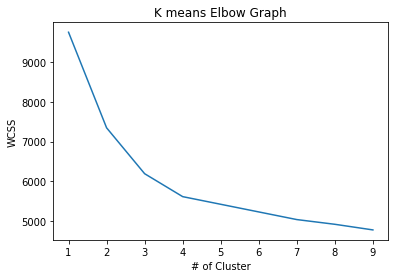

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dataset_X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(dataset_X)

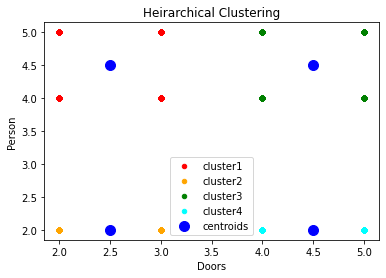

In [ ]:
#visualize the Cluster
plt.scatter(dataset_X[y_kmeans==0,0],dataset_X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(dataset_X[y_kmeans==1,0],dataset_X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(dataset_X[y_kmeans==2,0],dataset_X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(dataset_X[y_kmeans==3,0],dataset_X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Doors')
plt.ylabel('Person')
plt.legend()  
plt.show()

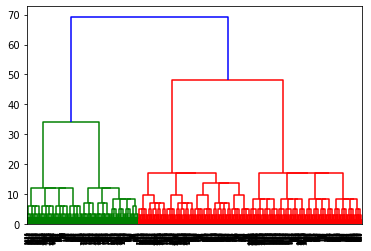

In [ ]:
#######################Heirarchichhal Clustering#####################
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_X,method='ward'))

[3 3 3 ... 0 0 0]


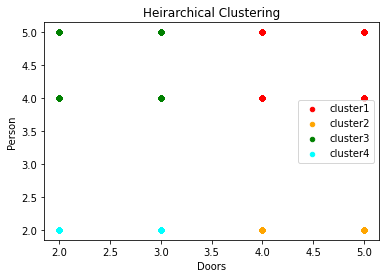

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc =  AgglomerativeClustering(n_clusters=4,linkage='ward')
y_hc = hc.fit_predict(dataset_X)
print(y_hc)


#visualize the Cluster
plt.scatter(dataset_X[y_hc==0,0],dataset_X[y_hc==0,1],s=20,c='red',label='cluster1')
plt.scatter(dataset_X[y_hc==1,0],dataset_X[y_hc==1,1],s=20,c='orange',label='cluster2')
plt.scatter(dataset_X[y_hc==2,0],dataset_X[y_hc==2,1],s=20,c='green',label='cluster3')
plt.scatter(dataset_X[y_hc==3,0],dataset_X[y_hc==3,1],s=20,c='cyan',label='cluster4')

plt.title('Heirarchical Clustering')
plt.xlabel('Doors')
plt.ylabel('Person')
plt.legend()  
plt.show()


In [ ]:
for i in y_hc:
    print(str(i)+" ",end=" ")

3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3  2

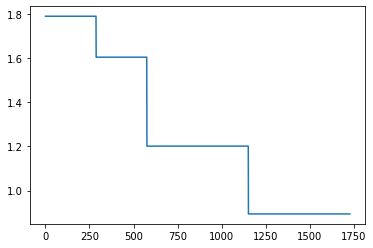

In [ ]:
#############################DBSCAN ALGORITHM###########################
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

X = StandardScaler().fit_transform(dataset_X)
ns = 4
nearestNeighbour = NearestNeighbors(ns).fit(X)
distances,indices = nearestNeighbour.kneighbors(X)
distanceDec = sorted(distances[:,3],reverse=True)
plt.plot(indices[:,0],distanceDec)
db = DBSCAN(eps=0.3,min_samples=5).fit(X)
labels = db.labels_  #-1 is noise points
db.core_sample_indices_     #core_datapointa
cores_samples_mask = np.zeros_like(db.labels_,dtype=bool)
cores_samples_mask[db.core_sample_indices_]=True
cores_samples_mask
n_clusters = len(set(labels))-1
unique_lables = set(labels)
colors= [plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_lables))]

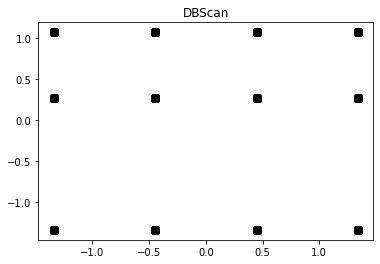

In [ ]:
for k,col in zip(unique_lables,colors):
    if(k==-1):
        col=[0,0,0,1]   #noise points
    noise_mask = labels==k

    y = X[cores_samples_mask & noise_mask]
    plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=15)    #core datapoints
    
    y = X[~cores_samples_mask & noise_mask]      #boundary datapoints  
    plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=8)    #boundary datapoints

plt.title('DBScan')
plt.show()

#Conclusion for the All ALgorithms Perfomance:
##1. All supervised algorithms that is KNN and Random forest gave almost the similar results to the dataset provided.Accuracy is almost same for each value of K from 1-21 as the data featuers are only the categorical features upto 2-3 values in each.
##2. The Unsupervised algoithm show the grouping of the clusters in right way but we can't visualoize it from graoh as it is drawn in 2D and also the Dataset contains only the categorical values in the field of features also which gets less data to be coreralted on basis of 2-3 featuers.
##3.I would say that If we first do the unsupervised learning algorithms and would find the clusters and based on that we can find the outliers from the Data and can be removed and should transfer the remaining dataset to the supervised learning algorithm for the classification.This can lead to good model making. 
##4. I would say that the Supervised algorithm are the best in the terms of finding the accuracy and prediction model as they are already having the labelled data and just they want to learn from it , while the unsupervised has to learn from the data itself and has more complex to learn and accuracy may be affected.